In [ ]:
!pip install scikit-fuzzy

In [ ]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
#Girdiler
bulasik_miktari=ctrl.Antecedent(np.arange(0,101,1),"bulaşık miktarı")
kirlilik_derecesi=ctrl.Antecedent(np.arange(0,101,1),"kirlilik derecesi")
bulasik_cinsi=ctrl.Antecedent(np.arange(0,101,1),"bulaşık cinsi")

#Çıktılar
yikama_zamani=ctrl.Consequent(np.arange(30,161,1),"yıkama zamanı")
deterjan_miktarı=ctrl.Consequent(np.arange(0,101,1),"deterjan miktarı")
su_sicakliği=ctrl.Consequent(np.arange(35,71,1),"su sıcaklığı")
ust_sepet_pompa_devri=ctrl.Consequent(np.arange(2100,3501,1),"üst sepet pompa devri")
alt_sepet_pompa_devri=ctrl.Consequent(np.arange(2100,3501,1),"alt sepet pompa devri")

In [ ]:
#Girdi değerleri için üyelik fonksiyonlarının belirlenmesi
bulasik_miktari.automf(3)
kirlilik_derecesi.automf(3)
bulasik_cinsi.automf(3)

In [ ]:
#Çıktı değerleri için üyelik fonksiyonlarının belirlenmesi

yikama_zamani["çok kısa"]=fuzz.trimf(yikama_zamani.universe,[30,30,60])
yikama_zamani["kısa"]=fuzz.trimf(yikama_zamani.universe,[40,80,90])
yikama_zamani["orta"]=fuzz.trimf(yikama_zamani.universe,[70,80,120])
yikama_zamani["uzun"]=fuzz.trimf(yikama_zamani.universe,[100,126,150])
yikama_zamani["çok uzun"]=fuzz.trimf(yikama_zamani.universe,[130,160,160])

deterjan_miktarı["çok az"]=fuzz.trimf(deterjan_miktarı.universe,[0,0,0])
deterjan_miktarı["az"]=fuzz.trimf(deterjan_miktarı.universe,[10,25,43])
deterjan_miktarı["normal"]=fuzz.trimf(deterjan_miktarı.universe,[33,50,67])
deterjan_miktarı["fazla"]=fuzz.trimf(deterjan_miktarı.universe,[57,75,93])
deterjan_miktarı["çok fazla"]=fuzz.trimf(deterjan_miktarı.universe,[83,100,100])

su_sicakliği["düşük"]=fuzz.trimf(su_sicakliği.universe,[35,35,50])
su_sicakliği["orta"]=fuzz.trimf(su_sicakliği.universe,[37,54,67])
su_sicakliği["yüksek"]=fuzz.trimf(su_sicakliği.universe,[55,80,80])

ust_sepet_pompa_devri["çok düşük"]=fuzz.trimf(ust_sepet_pompa_devri.universe,[2100,2100,2400])
ust_sepet_pompa_devri["düşük"]=fuzz.trimf(ust_sepet_pompa_devri.universe,[2300,2500,2700])
ust_sepet_pompa_devri["orta"]=fuzz.trimf(ust_sepet_pompa_devri.universe,[2600,2800,3000])
ust_sepet_pompa_devri["yüksek"]=fuzz.trimf(ust_sepet_pompa_devri.universe,[2900,3100,3300])
ust_sepet_pompa_devri["çok yüksek"]=fuzz.trimf(ust_sepet_pompa_devri.universe,[3200,3500,3500])

alt_sepet_pompa_devri["çok düşük"]=fuzz.trimf(alt_sepet_pompa_devri.universe,[2100,2100,2400])
alt_sepet_pompa_devri["düşük"]=fuzz.trimf(alt_sepet_pompa_devri.universe,[2300,2500,2700])
alt_sepet_pompa_devri["orta"]=fuzz.trimf(alt_sepet_pompa_devri.universe,[2600,2800,3000])
alt_sepet_pompa_devri["yüksek"]=fuzz.trimf(alt_sepet_pompa_devri.universe,[2900,3100,3300])
alt_sepet_pompa_devri["çok yüksek"]=fuzz.trimf(alt_sepet_pompa_devri.universe,[3200,3500,3500])


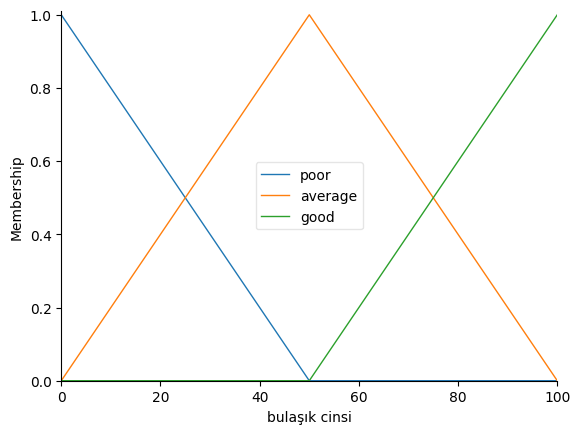

In [ ]:
bulasik_cinsi.view()

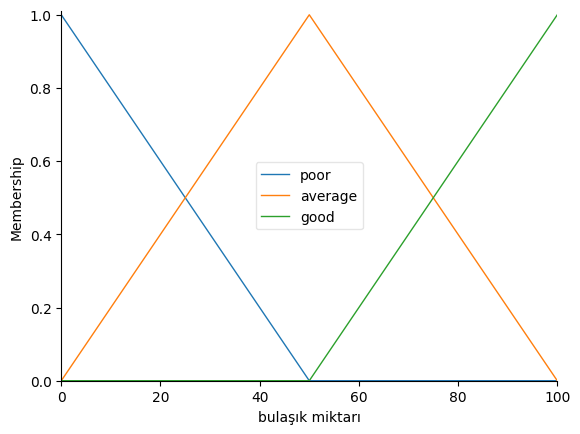

In [ ]:
bulasik_miktari.view()

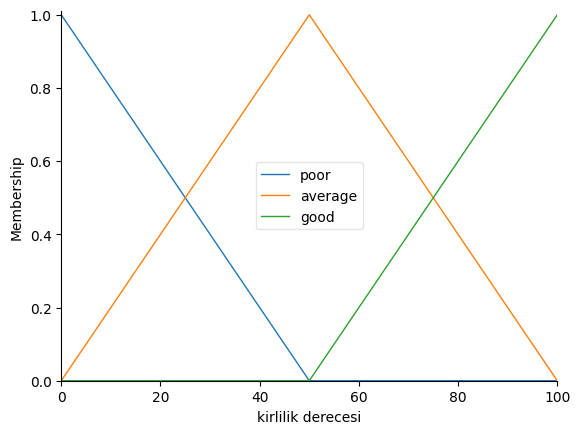

In [ ]:
kirlilik_derecesi.view()

In [ ]:
kural1 = ctrl.Rule(bulasik_miktari["poor"] & kirlilik_derecesi["poor"] & bulasik_cinsi["poor"],
                   [yikama_zamani["çok kısa"], deterjan_miktarı["çok az"], su_sicakliği["düşük"],
                    ust_sepet_pompa_devri["çok düşük"], alt_sepet_pompa_devri["çok düşük"]])

kural2 = ctrl.Rule(bulasik_miktari["poor"] & kirlilik_derecesi["poor"] & bulasik_cinsi["average"],
                   [yikama_zamani["kısa"], deterjan_miktarı["az"], su_sicakliği["düşük"],
                    ust_sepet_pompa_devri["düşük"], alt_sepet_pompa_devri["düşük"]])

kural3 = ctrl.Rule(bulasik_miktari["poor"] & kirlilik_derecesi["poor"] & bulasik_cinsi["good"],
                   [yikama_zamani["kısa"], deterjan_miktarı["az"], su_sicakliği["düşük"],
                    ust_sepet_pompa_devri["orta"], alt_sepet_pompa_devri["düşük"]])

kural4 = ctrl.Rule(bulasik_miktari["poor"] & kirlilik_derecesi["average"] & bulasik_cinsi["poor"],
                   [yikama_zamani["kısa"], deterjan_miktarı["az"], su_sicakliği["düşük"],
                    ust_sepet_pompa_devri["düşük"], alt_sepet_pompa_devri["orta"]])

kural5 = ctrl.Rule(bulasik_miktari["poor"] & kirlilik_derecesi["average"] & bulasik_cinsi["average"],
                   [yikama_zamani["orta"], deterjan_miktarı["normal"], su_sicakliği["orta"],
                    ust_sepet_pompa_devri["orta"], alt_sepet_pompa_devri["orta"]])

kural6 = ctrl.Rule(bulasik_miktari["poor"] & kirlilik_derecesi["average"] & bulasik_cinsi["good"],
                   [yikama_zamani["orta"], deterjan_miktarı["normal"], su_sicakliği["orta"],
                    ust_sepet_pompa_devri["yüksek"], alt_sepet_pompa_devri["orta"]])

kural7 = ctrl.Rule(bulasik_miktari["poor"] & kirlilik_derecesi["good"] & bulasik_cinsi["poor"],
                   [yikama_zamani["orta"], deterjan_miktarı["normal"], su_sicakliği["orta"],
                    ust_sepet_pompa_devri["orta"], alt_sepet_pompa_devri["yüksek"]])

kural8 = ctrl.Rule(bulasik_miktari["poor"] & kirlilik_derecesi["good"] & bulasik_cinsi["average"],
                   [yikama_zamani["uzun"], deterjan_miktarı["fazla"], su_sicakliği["yüksek"],
                    ust_sepet_pompa_devri["yüksek"], alt_sepet_pompa_devri["yüksek"]])

kural9 = ctrl.Rule(bulasik_miktari["poor"] & kirlilik_derecesi["good"] & bulasik_cinsi["good"],
                   [yikama_zamani["uzun"], deterjan_miktarı["fazla"], su_sicakliği["yüksek"],
                    ust_sepet_pompa_devri["çok yüksek"], alt_sepet_pompa_devri["yüksek"]])

kural10 = ctrl.Rule(bulasik_miktari["average"] & kirlilik_derecesi["poor"] & bulasik_cinsi["poor"],
                    [yikama_zamani["kısa"], deterjan_miktarı["az"], su_sicakliği["düşük"],
                     ust_sepet_pompa_devri["düşük"], alt_sepet_pompa_devri["düşük"]])

kural11 = ctrl.Rule(bulasik_miktari["average"] & kirlilik_derecesi["poor"] & bulasik_cinsi["average"],
                    [yikama_zamani["orta"], deterjan_miktarı["normal"], su_sicakliği["orta"],
                     ust_sepet_pompa_devri["orta"], alt_sepet_pompa_devri["düşük"]])

kural12 = ctrl.Rule(bulasik_miktari["average"] & kirlilik_derecesi["poor"] & bulasik_cinsi["good"],
                    [yikama_zamani["orta"], deterjan_miktarı["normal"], su_sicakliği["orta"],
                     ust_sepet_pompa_devri["yüksek"], alt_sepet_pompa_devri["düşük"]])

kural13 = ctrl.Rule(bulasik_miktari["average"] & kirlilik_derecesi["average"] & bulasik_cinsi["poor"],
                    [yikama_zamani["orta"], deterjan_miktarı["normal"], su_sicakliği["orta"],
                     ust_sepet_pompa_devri["orta"], alt_sepet_pompa_devri["orta"]])

kural14 = ctrl.Rule(bulasik_miktari["average"] & kirlilik_derecesi["average"] & bulasik_cinsi["average"],
                    [yikama_zamani["uzun"], deterjan_miktarı["fazla"], su_sicakliği["orta"],
                     ust_sepet_pompa_devri["yüksek"], alt_sepet_pompa_devri["orta"]])

kural15 = ctrl.Rule(bulasik_miktari["average"] & kirlilik_derecesi["average"] & bulasik_cinsi["good"],
                    [yikama_zamani["uzun"], deterjan_miktarı["fazla"], su_sicakliği["orta"],
                     ust_sepet_pompa_devri["çok yüksek"], alt_sepet_pompa_devri["orta"]])

kural16 = ctrl.Rule(bulasik_miktari["average"] & kirlilik_derecesi["good"] & bulasik_cinsi["poor"],
                    [yikama_zamani["uzun"], deterjan_miktarı["fazla"], su_sicakliği["orta"],
                     ust_sepet_pompa_devri["yüksek"], alt_sepet_pompa_devri["yüksek"]])

kural17 = ctrl.Rule(bulasik_miktari["average"] & kirlilik_derecesi["good"] & bulasik_cinsi["average"],
                    [yikama_zamani["çok uzun"], deterjan_miktarı["çok fazla"], su_sicakliği["yüksek"],
                     ust_sepet_pompa_devri["çok yüksek"], alt_sepet_pompa_devri["yüksek"]])

kural18 = ctrl.Rule(bulasik_miktari["average"] & kirlilik_derecesi["good"] & bulasik_cinsi["good"],
                    [yikama_zamani["çok uzun"], deterjan_miktarı["çok fazla"], su_sicakliği["yüksek"],
                     ust_sepet_pompa_devri["çok yüksek"], alt_sepet_pompa_devri["çok yüksek"]])

kural19 = ctrl.Rule(bulasik_miktari["good"] & kirlilik_derecesi["poor"] & bulasik_cinsi["poor"],
                    [yikama_zamani["orta"], deterjan_miktarı["normal"], su_sicakliği["düşük"],
                     ust_sepet_pompa_devri["orta"], alt_sepet_pompa_devri["düşük"]])


kural20=ctrl.Rule(bulasik_miktari["good"] & kirlilik_derecesi["poor"] & bulasik_cinsi["average"],
                    [yikama_zamani["çok kısa"],deterjan_miktarı["çok fazla"],su_sicakliği["düşük"],
                     ust_sepet_pompa_devri["çok düşük"],alt_sepet_pompa_devri["çok düşük"]])

kural21=ctrl.Rule(bulasik_miktari["good"] & kirlilik_derecesi["poor"] & bulasik_cinsi["good"],
                    [yikama_zamani["çok kısa"],deterjan_miktarı["çok fazla"],su_sicakliği["düşük"],
                     ust_sepet_pompa_devri["çok düşük"],alt_sepet_pompa_devri["çok düşük"]])

kural22=ctrl.Rule(bulasik_miktari["good"] & kirlilik_derecesi["average"] & bulasik_cinsi["poor"],
                    [yikama_zamani["çok kısa"],deterjan_miktarı["çok fazla"],su_sicakliği["düşük"],
                     ust_sepet_pompa_devri["çok düşük"],alt_sepet_pompa_devri["çok düşük"]])

kural23=ctrl.Rule(bulasik_miktari["good"] & kirlilik_derecesi["average"] & bulasik_cinsi["average"],
                    [yikama_zamani["çok kısa"],deterjan_miktarı["çok fazla"],su_sicakliği["düşük"],
                     ust_sepet_pompa_devri["çok düşük"],alt_sepet_pompa_devri["çok düşük"]])

kural24=ctrl.Rule(bulasik_miktari["good"] & kirlilik_derecesi["average"] & bulasik_cinsi["good"],
                    [yikama_zamani["çok kısa"],deterjan_miktarı["çok fazla"],su_sicakliği["düşük"],
                     ust_sepet_pompa_devri["çok düşük"],alt_sepet_pompa_devri["çok düşük"]])

kural25=ctrl.Rule(bulasik_miktari["good"] & kirlilik_derecesi["good"] & bulasik_cinsi["poor"],
                    [yikama_zamani["çok kısa"],deterjan_miktarı["çok fazla"],su_sicakliği["düşük"],
                     ust_sepet_pompa_devri["çok düşük"],alt_sepet_pompa_devri["çok düşük"]])

kural26=ctrl.Rule(bulasik_miktari["good"] & kirlilik_derecesi["good"] & bulasik_cinsi["average"],
                    [yikama_zamani["çok kısa"],deterjan_miktarı["çok fazla"],su_sicakliği["düşük"],
                     ust_sepet_pompa_devri["çok düşük"],alt_sepet_pompa_devri["çok düşük"]])

kural27=ctrl.Rule(bulasik_miktari["good"] & kirlilik_derecesi["good"] & bulasik_cinsi["good"],
                    [yikama_zamani["çok kısa"],deterjan_miktarı["çok fazla"],su_sicakliği["düşük"],
                     ust_sepet_pompa_devri["çok düşük"],alt_sepet_pompa_devri["çok düşük"]])




In [ ]:
durumKontrol=ctrl.ControlSystem([kural1,kural2,kural3,kural4,kural5,kural6,kural7,kural8,kural9,kural10,kural11,kural12,kural13,kural14,kural15,kural16,kural17,kural18,kural19,])

In [ ]:
durumBelirleme=ctrl.ControlSystemSimulation(durumKontrol)

In [ ]:
durumBelirleme.input["bulaşık miktarı"]=90
durumBelirleme.input["kirlilik derecesi"]=45
durumBelirleme.input["bulaşık cinsi"]=62

In [ ]:
durumBelirleme.compute()
print("Yıkama Zamanı : ",durumBelirleme.output["yıkama zamanı"]," dakika")
print("Deterjan Miktarı : ","%",durumBelirleme.output["deterjan miktarı"])
print("Sıcaklık : " ,durumBelirleme.output["su sıcaklığı"]," °C")
print("Üst Sepet Pompa Devri : ",durumBelirleme.output["üst sepet pompa devri"]," d/dak")
print("Alt Sepet Pompa Devri : ",durumBelirleme.output["alt sepet pompa devri"]," d/dak")

Yıkama Zamanı :  115.09972416719717  dakika
Deterjan Miktarı :  % 67.11232422973559
Sıcaklık :  52.192592592592575  °C
Üst Sepet Pompa Devri :  3117.442922374419  d/dak
Alt Sepet Pompa Devri :  2699.9999999999695  d/dak


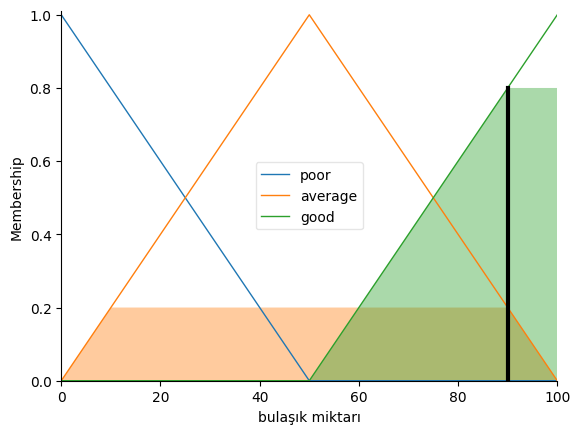

In [ ]:
bulasik_miktari.view(sim=durumBelirleme)

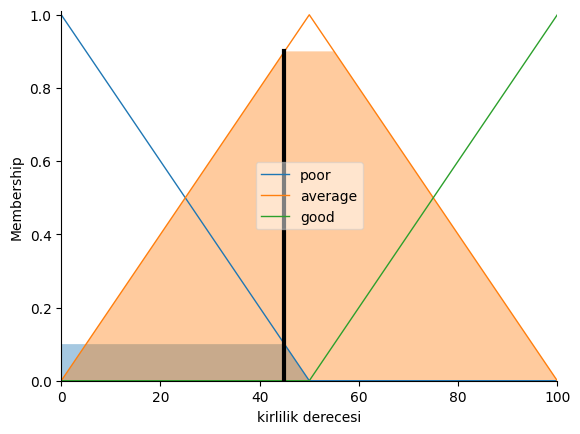

In [ ]:
kirlilik_derecesi.view(sim=durumBelirleme)

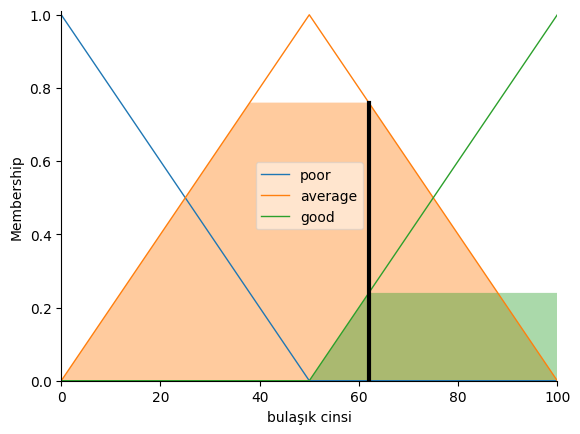

In [ ]:
bulasik_cinsi.view(sim=durumBelirleme)